<p style='font-size:200%;font-weight:bold'>加密货币数据处理</p>

- 一般正常的Ret会是多少 2017那组数据是怎么来的
- 周五是金融习惯还是刻意为之，比特币24/7
- daily return不用dropna么
- 从投资组合的角度，直接在100万美元画线的意思
- 周频时为什么出现duplicate
- 为什么要pd.offset.Day(3)
- 差异
- 为什么不能拿周频算回报率
- 为什么不winsorize0.01
- Value of Investment是用ret来描述的

In [3]:
import os
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = 'all'

os.getcwd()

ROOT = 'C:\\Users\\lyc\\Desktop\\SSCI\\'
DB = f'{ROOT}03_wdata/1100_coingecko/price/'
WD = f'{ROOT}03_wdata/0001_teaching/'

'C:\\Users\\lyc\\Desktop\\SSCI\\01_code'

# 读入数据

In [2]:
df = pd.read_parquet(f'{DB}bitcoin.pq')
#每一次要纳入变量都要使用f-string
df.shape
df.head()

(2989, 7)

,time,prices,market_caps,total_volumes,id,symbol,name
0,2014-01-01,767.74,9.358693e+09,23448600.0,bitcoin,btc,Bitcoin
1,2014-01-02,772.53,9.417083e+09,16837800.0,bitcoin,btc,Bitcoin
2,2014-01-03,825.47,1.006242e+10,54171500.0,bitcoin,btc,Bitcoin
3,2014-01-04,849.14,1.035095e+10,36344700.0,bitcoin,btc,Bitcoin
4,2014-01-05,919.41,1.120754e+10,62414600.0,bitcoin,btc,Bitcoin


<AxesSubplot:xlabel='time'>

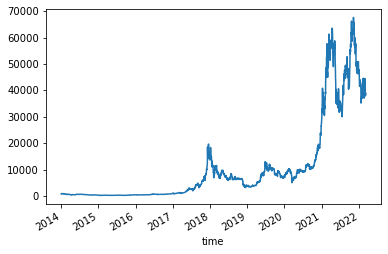

In [3]:
df.set_index('time', inplace=True)
df['prices'].plot()

# 合并数据

In [4]:
df_lst = []
for file in os.listdir(DB):
    #os.listdir获取该路径下所有文件名+文件类型
    if '.pq' not in file: continue
    # not in:逻辑运算符，没有在序列里找到则返回False
    df_lst.append(pd.read_parquet(f'{DB}{file}'))
    
dfm = pd.concat(df_lst)
dfm.shape
dfm.head()

(5183377, 7)

,time,prices,market_caps,total_volumes,id,symbol,name
0,2020-09-20,0.004209,0.0,5.489113e+05,xswap,xsp,XSwap
1,2020-09-21,0.004209,0.0,5.489113e+05,xswap,xsp,XSwap
2,2020-09-22,0.004555,0.0,1.100162e+06,xswap,xsp,XSwap
3,2020-09-23,0.001522,0.0,4.004421e+05,xswap,xsp,XSwap
4,2020-09-24,0.000977,0.0,1.640611e+05,xswap,xsp,XSwap


In [5]:
#dfm.to_parquet(f'{WD}1100_crypto.pq')

# 处理异常值

In [6]:
df = pd.read_parquet(f'{WD}1100_crypto.pq')
df

,time,prices,market_caps,total_volumes,id,symbol,name
0,2020-09-20,0.004209,0.0,5.489113e+05,xswap,xsp,XSwap
1,2020-09-21,0.004209,0.0,5.489113e+05,xswap,xsp,XSwap
2,2020-09-22,0.004555,0.0,1.100162e+06,xswap,xsp,XSwap
3,2020-09-23,0.001522,0.0,4.004421e+05,xswap,xsp,XSwap
4,2020-09-24,0.000977,0.0,1.640611e+05,xswap,xsp,XSwap
...,...,...,...,...,...,...,...
8,2022-03-05,0.511771,0.0,1.798891e+01,goldpesa-option,gpo,GoldPesa Option
9,2022-03-06,0.511771,0.0,1.798891e+01,goldpesa-option,gpo,GoldPesa Option
10,2022-03-07,0.514490,0.0,2.041367e+03,goldpesa-option,gpo,GoldPesa Option
11,2022-03-08,0.514490,0.0,2.041367e+03,goldpesa-option,gpo,GoldPesa Option


In [7]:
df.duplicated(subset=['time', 'id']).sum()

0

<AxesSubplot:xlabel='time'>

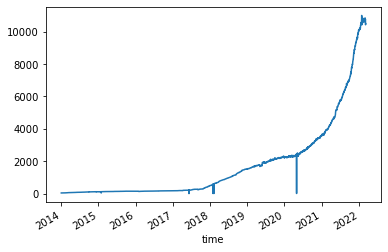

In [8]:
df.groupby(['time'])['id'].nunique().plot()

In [9]:
df.groupby(['time'])['id'].nunique().pct_change().sort_values().head(10)
#sort_values()将pct_change()从小到大排序
#观察到有小时分秒

time
2020-04-29 17:00:41.760   -0.999583
2018-02-08 00:05:00.253   -0.998261
2018-01-30 00:05:00.381   -0.998258
2017-06-08 23:39:21.692   -0.995122
2017-06-06 23:29:55.701   -0.995098
2015-01-28 00:00:00.000   -0.723214
2018-02-08 00:05:29.672   -0.500000
2018-01-30 00:05:28.871   -0.500000
2018-01-30 00:05:28.744   -0.500000
2018-02-08 00:05:21.414   -0.500000
Name: id, dtype: float64

In [10]:
df['time_round'] = df['time'].dt.round(freq='D')
#将日期round到指定频率
df.head()

,time,prices,market_caps,total_volumes,id,symbol,name,time_round
0,2020-09-20,0.004209,0.0,5.489113e+05,xswap,xsp,XSwap,2020-09-20
1,2020-09-21,0.004209,0.0,5.489113e+05,xswap,xsp,XSwap,2020-09-21
2,2020-09-22,0.004555,0.0,1.100162e+06,xswap,xsp,XSwap,2020-09-22
3,2020-09-23,0.001522,0.0,4.004421e+05,xswap,xsp,XSwap,2020-09-23
4,2020-09-24,0.000977,0.0,1.640611e+05,xswap,xsp,XSwap,2020-09-24


<AxesSubplot:xlabel='time_round'>

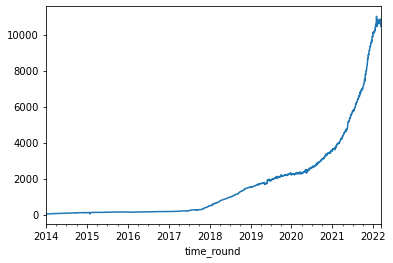

In [11]:
df.groupby(['time_round'])['id'].nunique().plot()

In [12]:
df.groupby(['time_round'])['id'].nunique().pct_change().sort_values().head(10)

time_round
2015-01-28   -0.723214
2014-10-01   -0.151515
2014-12-11   -0.145455
2014-01-10   -0.111111
2016-01-30   -0.100000
2014-12-12   -0.095745
2014-01-25   -0.085714
2014-01-21   -0.085714
2017-09-02   -0.083969
2014-01-04   -0.083333
Name: id, dtype: float64

In [13]:
df.loc[df['time_round'] == '2015-01-27', 'time'].value_counts()
df.loc[df['time_round'] == '2015-01-28', 'time'].value_counts()
df.loc[df['time_round'] == '2015-01-29', 'time'].value_counts()

df.loc[df['time_round'] == '2017-04-01', 'time'].value_counts()
df.loc[df['time_round'] == '2017-04-02', 'time'].value_counts()
df.loc[df['time_round'] == '2017-04-03', 'time'].value_counts()
#看日历看能否跳过

2015-01-27    112
Name: time, dtype: int64

2015-01-28    31
Name: time, dtype: int64

2015-01-29    112
Name: time, dtype: int64

2017-04-01    187
Name: time, dtype: int64

2017-04-02    187
Name: time, dtype: int64

2017-04-03    186
Name: time, dtype: int64

In [14]:
df.drop(columns=['time'], inplace=True)
df.rename(columns={'time_round':'time'}, inplace=True)
#列的重命名
df.head()

,prices,market_caps,total_volumes,id,symbol,name,time
0,0.004209,0.0,5.489113e+05,xswap,xsp,XSwap,2020-09-20
1,0.004209,0.0,5.489113e+05,xswap,xsp,XSwap,2020-09-21
2,0.004555,0.0,1.100162e+06,xswap,xsp,XSwap,2020-09-22
3,0.001522,0.0,4.004421e+05,xswap,xsp,XSwap,2020-09-23
4,0.000977,0.0,1.640611e+05,xswap,xsp,XSwap,2020-09-24


In [15]:
#df.to_parquet(f'{WD}1101_crypto_fix_time.pq}')

# 筛选数据

> Liu, Yukun, Aleh Tsyvinski, and Xi Wu, 2022, Common Risk Factors in Cryptocurrency, Journal of Finance.

In [16]:
df = pd.read_parquet(f'{WD}1101_crypto_fix_time.pq')
df.shape
df.head()

(5183377, 7)

,prices,market_caps,total_volumes,id,symbol,name,time
0,0.004209,0.0,5.489113e+05,xswap,xsp,XSwap,2020-09-20
1,0.004209,0.0,5.489113e+05,xswap,xsp,XSwap,2020-09-21
2,0.004555,0.0,1.100162e+06,xswap,xsp,XSwap,2020-09-22
3,0.001522,0.0,4.004421e+05,xswap,xsp,XSwap,2020-09-23
4,0.000977,0.0,1.640611e+05,xswap,xsp,XSwap,2020-09-24


In [17]:
df['id'].nunique()
df['symbol'].nunique()
df['name'].nunique()

12649

10680

12649

<AxesSubplot:>

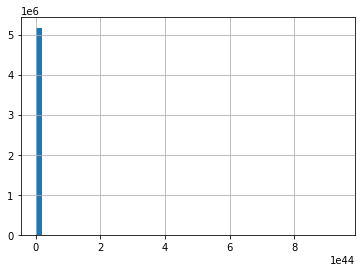

In [18]:
df['daily_ret'] = df.groupby(['id'])['prices'].pct_change()
pl1 = df.groupby(['id'])['prices'].shift()
#检查有无昨天是0的情况避免除以0
df.loc[pl1 == 0, 'daily_ret'] = np.nan
#loc的本质是裁剪行列，可以用一个辅助dataframe进行筛选
df['daily_ret'].hist(bins=50)

## 缺失值

In [19]:
df.isna().sum()

prices               0
market_caps        293
total_volumes       40
id                   0
symbol             667
name                 0
time                 0
daily_ret        12702
dtype: int64

In [20]:
df.dropna(subset=['prices', 'market_caps', 'total_volumes'], how='any', inplace=True)
df.isna().sum()

prices               0
market_caps          0
total_volumes        0
id                   0
symbol             667
name                 0
time                 0
daily_ret        12701
dtype: int64

In [21]:
#df.to_parquet(f'{WD}1102_crypto_day.pq')

## 小市值

In [22]:
df['gt_1m'] = (df['market_caps'] >= 10 ** 6)
df.groupby(['id'])['gt_1m'].agg(['nunique', 'max']).value_counts()
#agg把几种操作组合起来
#先看有无中间状态，再计算偏向哪种状态

nunique  max  
1        False    8794
2        True     3525
1        True      330
dtype: int64

In [23]:
df.head()

,prices,market_caps,total_volumes,id,symbol,name,time,daily_ret,gt_1m
0,0.004209,0.0,5.489113e+05,xswap,xsp,XSwap,2020-09-20,NaN,False
1,0.004209,0.0,5.489113e+05,xswap,xsp,XSwap,2020-09-21,0.000000,False
2,0.004555,0.0,1.100162e+06,xswap,xsp,XSwap,2020-09-22,0.082313,False
3,0.001522,0.0,4.004421e+05,xswap,xsp,XSwap,2020-09-23,-0.665974,False
4,0.000977,0.0,1.640611e+05,xswap,xsp,XSwap,2020-09-24,-0.357812,False


In [24]:
df2 = df.loc[df['gt_1m']].copy()
df2.shape
df2.head()

(1600069, 9)

,prices,market_caps,total_volumes,id,symbol,name,time,daily_ret,gt_1m
11,0.027199,5.439844e+07,9.346758e+06,odyssey,ocn,Odyssey,2018-02-05,-0.210672,True
12,0.018744,3.748767e+07,9.359014e+06,odyssey,ocn,Odyssey,2018-02-06,-0.310869,True
13,0.024691,4.938229e+07,1.757499e+07,odyssey,ocn,Odyssey,2018-02-07,0.317294,True
14,0.021616,4.323143e+07,1.575115e+07,odyssey,ocn,Odyssey,2018-02-08,-0.124556,True
15,0.024626,4.925170e+07,1.075072e+07,odyssey,ocn,Odyssey,2018-02-09,0.139257,True


## 周频

In [25]:
df2.duplicated(subset=['time', 'id']).sum()

3

In [26]:
df2[['year', 'week', 'day']] = df2['time'].dt.isocalendar()
df2

,prices,market_caps,total_volumes,id,symbol,name,time,daily_ret,gt_1m,year,week,day
11,0.027199,5.439844e+07,9.346758e+06,odyssey,ocn,Odyssey,2018-02-05,-0.210672,True,2018,6,1
12,0.018744,3.748767e+07,9.359014e+06,odyssey,ocn,Odyssey,2018-02-06,-0.310869,True,2018,6,2
13,0.024691,4.938229e+07,1.757499e+07,odyssey,ocn,Odyssey,2018-02-07,0.317294,True,2018,6,3
14,0.021616,4.323143e+07,1.575115e+07,odyssey,ocn,Odyssey,2018-02-08,-0.124556,True,2018,6,4
15,0.024626,4.925170e+07,1.075072e+07,odyssey,ocn,Odyssey,2018-02-09,0.139257,True,2018,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...
652,13.284669,2.020116e+08,2.901901e+06,lukso-token,lyxe,LUKSO Token,2022-03-05,-0.081107,True,2022,9,6
653,14.901492,2.267281e+08,1.987977e+06,lukso-token,lyxe,LUKSO Token,2022-03-06,0.121706,True,2022,9,7
654,13.525481,2.055845e+08,1.680815e+06,lukso-token,lyxe,LUKSO Token,2022-03-07,-0.092340,True,2022,10,1
655,12.871878,1.971746e+08,4.006113e+06,lukso-token,lyxe,LUKSO Token,2022-03-08,-0.048324,True,2022,10,2


In [27]:
df2['day'].value_counts()

3    229448
2    229051
1    228699
7    228459
6    228368
5    228123
4    227921
Name: day, dtype: Int64

In [28]:
df3 = df2.copy()
df3['time_tmp'] = df3['time'] + pd.offsets.Day(2)
#将timestamp往后推2天
df3[['year', 'week', 'day']] = df3['time_tmp'].dt.isocalendar()

df3.sort_values(['id', 'year', 'week', 'day'], ascending=True, inplace=True)
df3['unit_volumes'] = df3['total_volumes'] / df3['prices']

df3.head()

,prices,market_caps,total_volumes,id,symbol,name,time,daily_ret,gt_1m,year,week,day,time_tmp,unit_volumes
0,0.483325,1.933300e+07,64385.191049,0chain,zcn,0chain,2018-07-19,NaN,True,2018,29,6,2018-07-21,133213.046961
1,0.432846,1.731383e+07,92248.916728,0chain,zcn,0chain,2018-07-20,-0.104442,True,2018,29,7,2018-07-22,213121.913759
2,0.391944,1.567774e+07,131175.413170,0chain,zcn,0chain,2018-07-21,-0.094496,True,2018,30,1,2018-07-23,334679.303038
3,0.377234,1.508935e+07,62006.348324,0chain,zcn,0chain,2018-07-22,-0.037530,True,2018,30,2,2018-07-24,164371.105279
4,0.360793,1.443172e+07,24066.254330,0chain,zcn,0chain,2018-07-23,-0.043583,True,2018,30,3,2018-07-25,66703.794895


In [29]:
#pd.Timestamp('2000-01-01') + pd.offsets.Day(2)
#将timestamp往后推2天
#df2.dtypes
#数据本身就是datatime形式

In [30]:
df3 = df3.groupby(['id', 'year', 'week']).agg({
    'time':'last',
    'prices':['last', 'max'],
    'market_caps':'last',
    'total_volumes':['mean', 'last', 'std'],
    'unit_volumes':'mean',
    'daily_ret':['mean', 'max', 'std'],
    'symbol':'last',
    'name':'last'
})

df3.columns = [
    'time',
    'price', 'max prices',
    'market_caps',
    'avg_volumnes', 'eow_volumnes', 'std_volumnes',
    'unit_volumes',
    'avg_daily_ret', 'max_daily_ret', 'std_daily_ret',
    'symbol',
    'name'
]

df3['day'] = df3['time'].dt.isocalendar().day
df3.sample(3)
#虽然有‘’仍是函数
#dataframe.last根据timestamp找最后一天
#agg的多个操作会输出多个列

,,,time,price,max prices,market_caps,avg_volumnes,eow_volumnes,std_volumnes,unit_volumes,avg_daily_ret,max_daily_ret,std_daily_ret,symbol,name,day
id,year,week,,,,,,,,,,,,,,
foam-protocol,2019,34,2019-08-23,0.031285,0.037864,1.042051e+07,1.707076e+04,1.736383e+04,2.506534e+03,5.171447e+05,-0.007798,0.115880,0.093341,foam,FOAM,5
nucypher,2021,17,2021-04-30,0.527394,0.527394,1.859904e+08,3.902447e+07,3.544061e+07,2.454348e+07,8.240830e+07,0.032388,0.235219,0.101558,nu,NuCypher,5
electroneum,2019,16,2019-04-19,0.005045,0.005905,4.691053e+07,3.424483e+05,5.144703e+05,1.089186e+05,6.317134e+07,-0.017336,0.041746,0.031518,etn,Electroneum,5


In [31]:
df3['day'].value_counts() / df3.shape[0]
#df3.shape[0]取行数
#每一个weekday占总数据的百分比

5    0.949006
3    0.017169
4    0.012742
2    0.006735
1    0.006032
7    0.004468
6    0.003848
Name: day, dtype: Float64

In [32]:
#df3.shape
#df3.shape[0]
#df3['day'].value_counts()

## 输出

In [33]:
df3.reset_index(inplace=True)
df3.shape
df3.sample(3)

(240380, 17)

,id,year,week,time,price,max prices,market_caps,avg_volumnes,eow_volumnes,std_volumnes,unit_volumes,avg_daily_ret,max_daily_ret,std_daily_ret,symbol,name,day
238834,zignaly,2021,37,2021-09-17,0.038625,0.039961,1.132124e+07,2.403237e+05,2.339315e+05,5.719002e+04,6.174478e+06,-0.010464,0.038475,0.038847,zig,Zignaly,5
150022,oraichain-token,2021,29,2021-07-23,4.565094,4.565094,9.334439e+06,2.254232e+05,1.627933e+05,6.142413e+04,5.184264e+04,-0.002809,0.123725,0.067296,orai,Oraichain Token,5
45787,compound-wrapped-btc,2021,28,2021-07-16,636.378831,687.256654,8.021360e+06,1.751931e+07,6.410697e+06,2.038722e+07,2.625050e+04,-0.004610,0.033378,0.024655,cwbtc,cWBTC,5


In [34]:
#df3.to_parquet(f'{WD}1103_crypto_week.pq')

# 描述统计

In [35]:
df = pd.read_parquet(f'{WD}1103_crypto_week.pq')
df.shape
df.sample(3)

(240380, 17)

,id,year,week,time,prices,max_prices,market_caps,avg_volumes,eow_volumes,std_volumes,unit_volumes,avg_daily_ret,max_daily_ret,std_daily_ret,symbol,name,day
215068,umbrella-network,2021,36,2021-09-10,0.232890,0.252085,1.997303e+07,577732.620523,724132.550721,151589.998257,2.495287e+06,-0.010592,0.090280,0.070174,umb,Umbrella Network,5
129811,mirrored-united-states-oil-fund,2022,9,2022-03-04,75.435890,75.435890,6.458843e+06,448161.330832,570977.331615,366619.929667,6.144170e+03,0.012832,0.084275,0.048302,muso,Mirrored United States Oil Fund,5
188683,snetwork,2019,12,2019-03-22,0.012224,0.013279,1.707479e+06,77173.055661,69263.180979,37586.051423,6.065990e+06,-0.007159,0.029707,0.032671,snet,Snetwork,5


<AxesSubplot:xlabel='year'>

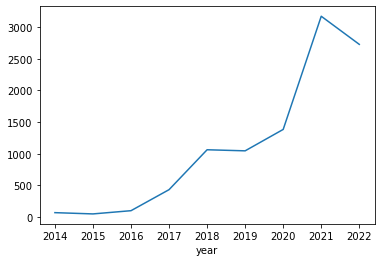

In [36]:
df.groupby(['year'])['id'].nunique().plot()

In [37]:
ltw = df.loc[df['time'].between('2014-01-01', '2020-07-31')].copy()
ltw['avg_volumes'] = ltw['avg_volumes'] / 10 ** 3
ltw['market_caps'] = ltw['market_caps'] / 10 ** 6
ltw.shape
ltw.sample(3)

(102408, 17)

,id,year,week,time,prices,max_prices,market_caps,avg_volumes,eow_volumes,std_volumes,unit_volumes,avg_daily_ret,max_daily_ret,std_daily_ret,symbol,name,day
174946,rex,2018,3,2018-01-19,0.973278,2.365830,8.429323,9.967867,3.805090e+03,7403.745296,5.324152e+03,-0.147361,0.107009,0.155153,rex,Imbrex,5
14439,aurora,2019,33,2019-08-16,0.016764,0.018693,72.762380,1546.040489,1.578121e+06,518559.668454,8.592931e+07,-0.030697,0.016875,0.046491,aoa,Aurora Chain,5
203736,ternio,2018,41,2018-10-12,0.019676,0.025180,8.517410,31.938193,3.884796e+04,7700.423661,1.478605e+06,-0.014703,0.148182,0.112120,tern,Ternio,5


## 规模

In [38]:
ltw.groupby(['year']).agg({
    'id':'nunique',
    'market_caps':['mean', 'median'],
    'avg_volumes':['mean', 'median'],
})

id market_caps               avg_volumes            
     nunique        mean     median           mean      median
year                                                          
2014      69  279.283936   4.468244    2120.809354   42.684782
2015      49  182.182583   4.541816   11516.562831   14.577912
2016     100  199.724404   3.710771   37818.996662   27.363664
2017     432  711.485454  14.461603   21532.355465  224.851310
2018    1062  471.558721  12.042173   22456.830961  206.039498
2019    1045  316.999742   5.392450  104908.383799  260.743527
2020     914  391.578806   5.167135  183705.527154  384.014437

## 回报率

In [39]:
ltw['market_caps_l1'] = ltw.groupby('id')['market_caps'].shift()

### Log Return

In [ ]:
#(ltw['price'] == 0).sum()

In [ ]:
#ltw['price_l1'] = ltw.groupby(['id'])['price'].shift()
#ltw['ret'] = np.log(ltw['price']) - np.log(ltw['price_l1'])
#ltwp['ret'].hist(bins=50)

In [ ]:
# ltw.loc[ltw['ret'] <= -2, 'ret'] = -2
# ltw.loc[ltw['ret'] >= 2, 'ret'] = 2
# ltw['ret'].hist(bins=50)

### Pct Return

<AxesSubplot:>

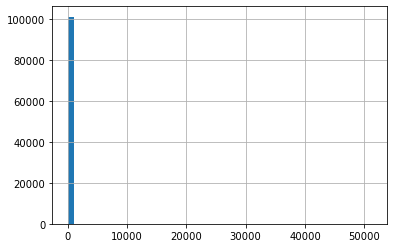

In [44]:
ltw['ret'] = ltw.groupby(['id'])['prices'].pct_change()
ltw['ret'].hist(bins=50)

<AxesSubplot:>

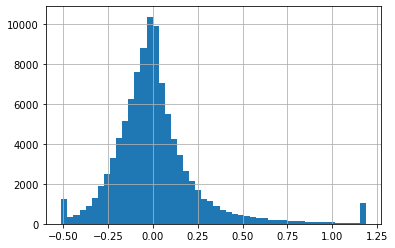

In [43]:
#ltw.loc[ltw['ret'] <= ltw['ret'].quantile(0.01), 'ret'] = ltw['ret'].quantile(0.01)
#ltw.loc[ltw['ret'] >= ltw['ret'].quantile(0.99), 'ret'] = ltw['ret'].quantile(0.99)
#ltw['ret'].hist(bins=50)

<AxesSubplot:>

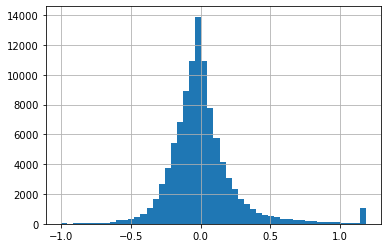

In [45]:
ltw.loc[ltw['ret'] >= ltw['ret'].quantile(0.99), 'ret'] = ltw['ret'].quantile(0.99)
ltw['ret'].hist(bins=50)

In [46]:
ltw.loc[ltw['symbol'] == 'btc'].tail(3)

,id,year,week,time,prices,max_prices,market_caps,avg_volumes,eow_volumes,std_volumes,unit_volumes,avg_daily_ret,max_daily_ret,std_daily_ret,symbol,name,day,market_caps_l1,ret
23678,bitcoin,2020,29,2020-07-17,9136.483376,9297.479636,168496.782961,1.775497e+07,1.876048e+10,1.131628e+09,1.922800e+06,-0.001528,0.006840,0.005727,btc,Bitcoin,5,170198.606144,-0.010744
23679,bitcoin,2020,30,2020-07-24,9589.817719,9589.817719,176821.599774,1.886022e+07,2.696615e+10,3.971590e+09,2.019836e+06,0.006980,0.024142,0.009445,btc,Bitcoin,5,168496.782961,0.049618
23680,bitcoin,2020,31,2020-07-31,11116.307164,11116.307164,205200.775318,2.864144e+07,2.226538e+10,7.068406e+09,2.766322e+06,0.021916,0.104426,0.038199,btc,Bitcoin,5,176821.599774,0.159178


### 对比

In [47]:
mkt = ltw.copy()
mkt['wgt_ret'] = mkt['market_caps_l1'] * mkt['ret']
mkt = mkt.groupby(['year', 'week'])[['wgt_ret', 'market_caps_l1']].sum()
#注意，这里两个列做操作要双方括号
mkt['mkt'] = mkt['wgt_ret'] / mkt['market_caps_l1']
mkt.tail(3)
mkt.shape
mkt = mkt.loc[:, ['mkt']]
mkt.sample(3)

wgt_ret  market_caps_l1       mkt
year week                                        
2020 29    -2335.355541   275702.388465 -0.008471
     30    16781.746301   274226.096927  0.061197
     31    40444.128895   291618.271536  0.138689

(344, 3)

,,mkt
year,week,
2018,10,-0.167864
2016,33,-0.027562
2014,3,-0.059123


In [54]:
rets = {'mkt' : mkt}
#以前是用rets = []因为之前没有数据
#本质上还是一个dataframe，只是用另一种形式dict

for sym in ['btc', 'xrp', 'eth']:
    tmp = ltw.loc[ltw['symbol'] == sym, ['year', 'week', 'ret']].set_index(['year', 'week']).rename(columns={'ret':sym})
    #可以设双index
    tmp.shape
    rets[sym] = tmp
    
rets = pd.concat(rets.values(), axis=1)
#将dictvalue进行横向拼接
rets.shape
rets.head()

(344, 1)

(344, 1)

(260, 1)

(344, 4)

mkt       btc       xrp  eth
year week                                   
2014 1          NaN       NaN       NaN  NaN
     2     0.028162  0.045828 -0.185323  NaN
     3    -0.059123 -0.058381 -0.094150  NaN
     4    -0.011628 -0.005634 -0.105310  NaN
     5     0.013521  0.011889  0.112204  NaN

In [52]:
#rets = {'mkt' : mkt}
#rets
#tmp = ltw.loc[ltw['symbol'] == 'btc', ['year', 'week', 'ret']].set_index(['year', 'week']).rename(columns={'ret':'btc'})
#tmp
#rets['btc'] = tmp
#rets
rets.values()

dict_values([                mkt
year week          
2014 1          NaN
     2     0.028162
     3    -0.059123
     4    -0.011628
     5     0.013521
...             ...
2020 27   -0.018957
     28    0.047373
     29   -0.008471
     30    0.061197
     31    0.138689

[344 rows x 1 columns],                 btc
year week          
2014 1          NaN
     2     0.045828
     3    -0.058381
     4    -0.005634
     5     0.011889
...             ...
2020 27   -0.017751
     28    0.015548
     29   -0.010744
     30    0.049618
     31    0.159178

[344 rows x 1 columns]])

In [56]:
pd.concat([rets.describe(percentiles=[]).T, rets.skew().rename('skewness').to_frame(), rets.kurtosis().rename('kurtosis').to_frame()], axis=1)
#describe(percentiles=[])describe默认会有0.25，0.5，0.75三种，percentiles=[]就只有0.5
#.T按照右对角线transpose
#[]变成list
#rets.skew()返回skewness的list
#.to_frame()将series/list转换成datafranme
#list也自带名字Name
#将dataframe拼接的方式就是先转化成list/series再concat

,count,mean,std,min,50%,max,skewness,kurtosis
mkt,343.0,0.011204,0.100153,-0.447446,0.006756,0.353736,0.039375,1.771694
btc,343.0,0.012732,0.101918,-0.431014,0.007820,0.537689,0.387283,3.074798
xrp,343.0,0.022692,0.214870,-0.504629,-0.015577,1.185344,2.886260,11.495856
eth,259.0,0.036111,0.198088,-0.515094,-0.001362,1.185344,2.252047,9.606756


In [66]:
#[rets.describe(percentiles=[]).T]
#rets.skew().rename('skewness').to_frame()

,skewness
mkt,0.039375
btc,0.387283
xrp,2.886260
eth,2.252047


## 走势

In [68]:
rets += 1

In [69]:
cum_rets = rets.cumprod() - 1

<AxesSubplot:xlabel='year,week'>

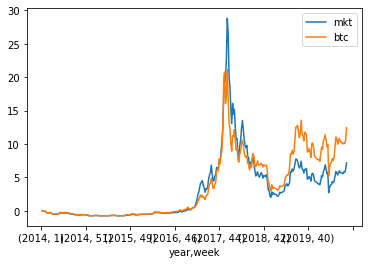

In [70]:
cum_rets[['mkt', 'btc']].plot()

<AxesSubplot:xlabel='year,week'>

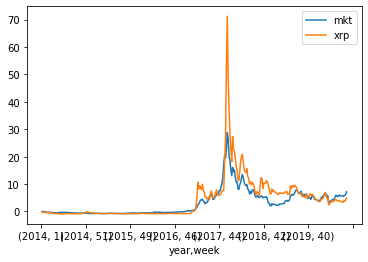

In [72]:
cum_rets[['mkt','xrp']].plot()

<AxesSubplot:xlabel='year,week'>

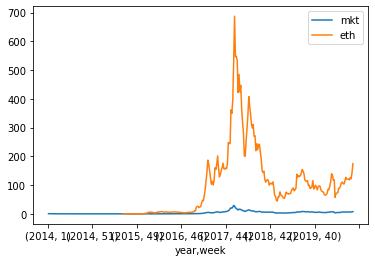

In [71]:
cum_rets[['mkt', 'eth']].plot()